In [2]:
dataset = CSV.read("../data/2016-2022.csv", select = [:year,:event_date,:event_type, :sub_event_type, :interaction, :admin1, :location, :latitude, :longitude, :fatalities, :notes], DataFrame)

,event_date,year,event_type,sub_event_type,interaction,admin1
,String31,Int64,String31,String,Int64,String
1,18 March 2022,2022,Riots,Mob violence,55,Uttar Pradesh
2,18 March 2022,2022,Protests,Peaceful protest,60,Maharashtra
3,18 March 2022,2022,Protests,Peaceful protest,60,Punjab
4,18 March 2022,2022,Protests,Peaceful protest,60,Madhya Pradesh
5,18 March 2022,2022,Riots,Mob violence,57,Madhya Pradesh
6,18 March 2022,2022,Riots,Mob violence,57,Madhya Pradesh
7,18 March 2022,2022,Protests,Peaceful protest,60,Telangana
8,18 March 2022,2022,Protests,Peaceful protest,60,Telangana
9,18 March 2022,2022,Protests,Peaceful protest,60,Telangana


In [3]:
df = select(dataset, [:event_date, :year, :event_type, :interaction, :admin1, :notes]);

In [4]:
function farmers_filter(data::String)
	keywords = [
		"farm",
		"agricult",
		"plantat",
		"dairy",
		"harvest",
		#"cultiv",
		#"crop"
	]
	any(occursin.(keywords,lowercase(data)))
end

farmers_filter (generic function with 1 method)

In [5]:
function refilter(df::DataFrame)
	out = filter(:notes => farmers_filter, df) |> d -> filter(:year => yr -> yr in [2020, 2021], d) |> d -> filter(:event_type => event -> event == "Protests", d)
end

refilter (generic function with 1 method)

In [6]:
df_farmers = refilter(df)

df_agri = groupby(df_farmers, :admin1)
df_agri_col = combine(df_farmers, nrow .=> :num_of_protests);

In [7]:
df_agri_col = groupby(df_agri, :admin1);

LoadError: MethodError: no method matching groupby(::GroupedDataFrame{DataFrame}, ::Symbol)
[0mClosest candidates are:
[0m  groupby([91m::AbstractDataFrame[39m, ::Any; sort, skipmissing) at C:\Users\macie\.julia\packages\DataFrames\MA4YO\src\groupeddataframe\groupeddataframe.jl:211

In [8]:
df_agri = df[(df.year .== 2020) .| (df.year .==2021),:];
df_farmers = refilter(df_agri)

,event_date,year,event_type,interaction,admin1,notes
,String31,Int64,String31,Int64,String,String
1,31 December 2021,2021,Protests,60,Punjab,"On 31 December 2021, BKU farmers staged a protest, in Bathinda (Bathinda district, Punjab), demanding compensation for the cotton crop damage and debt waiver for marginal and small farmers. [size=no report]"
2,31 December 2021,2021,Protests,60,Punjab,"On 31 December 2021, BKU farmers staged a protest, in Mansa (Mansa district, Punjab), demanding compensation for the cotton crop damage and debt waiver for marginal and small farmers. [size=no report]"
3,31 December 2021,2021,Protests,60,Andhra Pradesh,"On 31 December 2021, farmers staged a protest outside the police station in Komarada (Vizianagaram district, Andhra Pradesh) demanding steps by authorities to drive away wild elephants from their areas. [size=no report]"
4,30 December 2021,2021,Protests,60,Karnataka,"On 30 December 2021, farmers held a protest near the DC office in Mysuru (Mysuru district, Karnataka) demanding a CPI probe into Nandini ghee adulteration racket. [size=no report]"
5,29 December 2021,2021,Protests,60,Punjab,"On 29 December 2021, BKU farmers staged a protest, at the Deputy Commissioner office, in Ludhiana (Ludhiana East, Ludhiana district, Punjab), demanding crop damage compensation and loan waivers. [size=no report]"
6,29 December 2021,2021,Protests,60,Punjab,"On 29 December 2021, BKU farmers supported teachers and members of the Government Colleges Guest Faculty Assistant Professors' Association, in Jalandhar (Jalandhar-I, Jalandhar district, Punjab), demanding regularisation of services. [size=no report]"
7,29 December 2021,2021,Protests,60,Punjab,"On 29 December 2021, BKU farmers staged a protest, at the Deputy Commissioner office, in Barnala (Barnala district, Punjab), demanding crop damage compensation and loan waivers. [size=no report]"
8,29 December 2021,2021,Protests,60,Punjab,"On 29 December 2021, BKU farmers staged a protest, at the Deputy Commissioner office, in Sangrur (Sangrur district, Punjab), demanding crop damage compensation and loan waivers. [size=no report]"
9,29 December 2021,2021,Protests,16,Uttar Pradesh,"On 29 December 2021, farmers staged a protest and locked up stray cattle in a village in Shahjahanpur district (Shahjahanpur district, UP), over crop damage. Police arrested around 10 protesters. [size=no report]"


In [9]:

df_agri_col = groupby(df_farmers, :admin1);

df_agri_col = combine(df_agri_col, nrow .=> :num_of_protests) 


,admin1,num_of_protests
,String,Int64
1,Uttar Pradesh,362
2,Maharashtra,312
3,Punjab,1904
4,Madhya Pradesh,87
5,Telangana,248
6,Kerala,50
7,Karnataka,296
8,Tamil Nadu,470
9,West Bengal,104


In [10]:
wrong_cities = ["Telangana", "Jammu and Kashmir", "Delhi", "Goa", "Arunachal Pradesh","Jharkhand","Chandigarh", "Chhattisgarh", "Puducherry", "Arunachal","Pradesh", "Mizoram", "Manipur", "Meghalaya", "Uttarakhand" ,"Ladakh","Nagaland", "Sikkim", "Lakshadweep", "Andaman and Nicobar Islands"];

In [11]:
for city in wrong_cities
    df_agri_col = df_agri_col[df_agri_col.admin1 .!= city,:]
end

In [12]:
df_agri_col

,admin1,num_of_protests
,String,Int64
1,Uttar Pradesh,362
2,Maharashtra,312
3,Punjab,1904
4,Madhya Pradesh,87
5,Kerala,50
6,Karnataka,296
7,Tamil Nadu,470
8,West Bengal,104
9,Andhra Pradesh,176


In [13]:
df_agri_col = sort(df_agri_col, :admin1)

,admin1,num_of_protests
,String,Int64
1,Andhra Pradesh,176
2,Assam,102
3,Bihar,159
4,Gujarat,42
5,Haryana,867
6,Himachal Pradesh,96
7,Karnataka,296
8,Kerala,50
9,Madhya Pradesh,87


In [14]:
df_agri_col[!,"Nitrogen"] = [1.55,1.76, missing, 1.71, 1.04, 2.34, 2.05, 1.66, 1.27, 1.40, 1.57, 1.67, missing, 1.34, 1.76, 1.25, 1.67];

In [15]:
df_agri_col[!,"Phosphorus"] = [1.57,2.13,missing, 1.64,1.20,1.93,1.90,2.35,1.84,1.16,1.54,1.93,missing, 2.11,1.69,1.32,2.05];

In [16]:
df_agri_col[!,"Potassium"] = [2.52,2.14,missing, 2.60,2.05,1.63,2.54,1.98,2.48, 2.66,1.93,2.40,missing, 2.40,1.70, 2.21,2.04];

In [17]:
df_agri_col

,admin1,num_of_protests,Nitrogen,Phosphorus,Potassium
,String,Int64,Float64?,Float64?,Float64?
1,Andhra Pradesh,176,1.55,1.57,2.52
2,Assam,102,1.76,2.13,2.14
3,Bihar,159,missing,missing,missing
4,Gujarat,42,1.71,1.64,2.6
5,Haryana,867,1.04,1.2,2.05
6,Himachal Pradesh,96,2.34,1.93,1.63
7,Karnataka,296,2.05,1.9,2.54
8,Kerala,50,1.66,2.35,1.98
9,Madhya Pradesh,87,1.27,1.84,2.48


In [18]:
agri_col_cleansed = dropmissing(df_agri_col)

,admin1,num_of_protests,Nitrogen,Phosphorus,Potassium
,String,Int64,Float64,Float64,Float64
1,Andhra Pradesh,176,1.55,1.57,2.52
2,Assam,102,1.76,2.13,2.14
3,Gujarat,42,1.71,1.64,2.6
4,Haryana,867,1.04,1.2,2.05
5,Himachal Pradesh,96,2.34,1.93,1.63
6,Karnataka,296,2.05,1.9,2.54
7,Kerala,50,1.66,2.35,1.98
8,Madhya Pradesh,87,1.27,1.84,2.48
9,Maharashtra,312,1.4,1.16,2.66


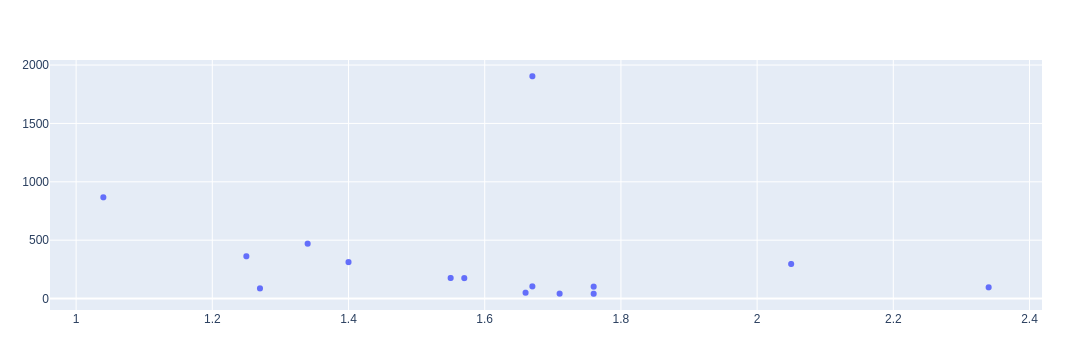

In [19]:
plot(scatter(agri_col_cleansed, x=:Nitrogen, y=:num_of_protests, mode="markers"))

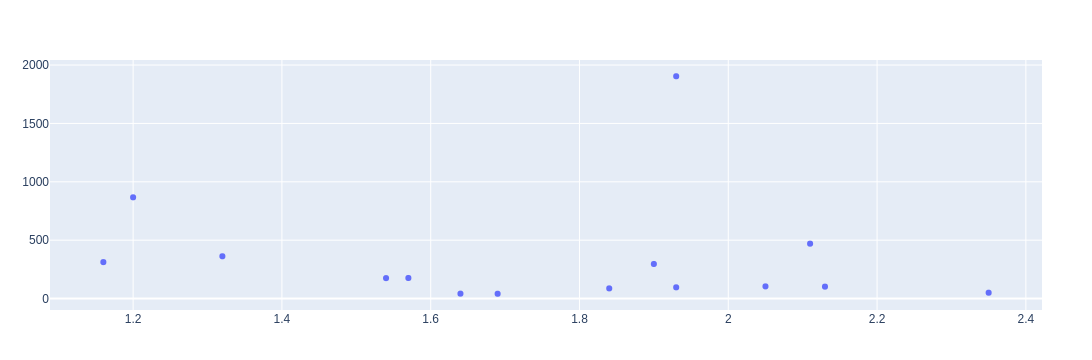

In [20]:
plot(scatter(agri_col_cleansed, x=:Phosphorus, y=:num_of_protests, mode="markers"))

In [21]:
trace = scatter(agri_col_cleansed, x=:Potassium, y=:num_of_protests, mode="markers")
layout = Layout(xaxis_title="Procentowy udział Potasu w próbce gleby w danym stanie", yaxis_title="Ilość protestów", title=attr(text="Ilość protestów w zależności od procentowego udziału Potasu w składzie próbki gleby w danym stanie", y=0.95,
x=0.5, xanchor="center", yanchor="top"))
plot(trace, layout)

In [22]:
x1 =agri_col_cleansed[!, "Nitrogen"]
x2 =agri_col_cleansed[!, "Phosphorus"]
x3 =agri_col_cleansed[!, "Potassium"]

15-element Vector{Float64}:
 2.52
 2.14
 2.6
 2.05
 1.63
 2.54
 1.98
 2.48
 2.66
 1.93
 2.4
 2.4
 1.7
 2.21
 2.04

In [23]:
y = agri_col_cleansed[!, "num_of_protests"]

15-element Vector{Int64}:
  176
  102
   42
  867
   96
  296
   50
   87
  312
  175
 1904
  470
   41
  362
  104

In [24]:
cor(x1,y) ##niewielka tendencja do spadku protesstów wraz z natężeniem procentowego udziału azotu w glebie 

-0.21614546221855174

In [25]:
cor(x2, y) ##bardzo mała tendencja spadkowa

-0.10336462949164442

In [26]:
cor(x3,y)##niewielka tendencja wzrostowa

0.19798412783079936

In [27]:
 a = crosscor(x1, y)

25-element Vector{Float64}:
  0.01715735801586168
  0.06594889894720382
 -0.08958293706223491
  0.10549933246819267
 -0.0725886429848269
  0.1309376285317461
  0.06735467454779248
 -0.024856344167804575
 -0.07350751863159852
 -0.3009974743486206
  0.1906393149908655
  0.11191348897611675
 -0.21614546221855171
  0.06712900660189892
 -0.25353491155209307
 -0.2666494057002169
  0.05135339984851061
  0.2866827282890723
  0.5882212226904272
 -0.38283168784259725
 -0.0691918629279739
  0.15763646854857097
 -0.12664957568689308
  0.03658864476438512
 -0.0026669427793676323

In [29]:

plot(crosscor(x3, y), Layout(yaxis_title="współczynnik korelacji", xaxis_title="lags", title_text ="Oscylacje współczynnika korelacji"))

In [42]:
corspearman(x1,y)
corspearman(x2, y)
corspearman(x3, y)

LoadError: UndefVarError: x1 not defined